<function matplotlib.pyplot.show(close=None, block=None)>

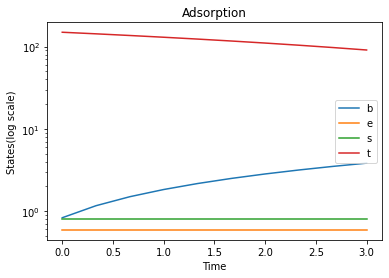

In [15]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 12 10:41:09 2021

@author: sojore
"""
#importing important libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

def coupled_pde_func(x,t):
    #defining constants
    Co2=0.1889
    k1=60
    k2=12
    k3=19.6
    k4=75.1
    k5=19.8
    kCo2=375.3
    ohmCo2=0.038
    N=20
    L=1
    dx=L/N
    DCo2=0.549
    DH20=0.873
    dt=0.1
    t_final=150
    T0=0
    
    #assinging each ODE a vector element
    A=x[0]
    B=x[1]
    C=x[2]
    P=x[3]
    
    t = np.linspace(0, 10, 150)
    dt = np.diff(t)
    x=np.linspace(dx/2,L-dx/2,N)
    A=np.ones(N)*T0
    B=np.ones(N)*T0
    C=np.ones(N)*T0
    P=np.ones(N)*T0
    dAdt=np.empty(N)
    dBdt=np.empty(N)
    dCdt=np.empty(N)
    dPdt=np.empty(N)
    t1=np.arange(0,150,0.1)
    #t2=t1.all()
    #t1=np.logical_and(t1)
    
    
    #defining the ODES
    for j in range(1,len(t1)):
        for i in range(1,N-1):
            dAdt[i]=-(A[i+1]-A[i-1])/2*dx+(DCo2*(A[i+1]-2*A[i]+A[i-1]))/dx**2-(k1-Co2)*(1-C[i]-P[i])
            dBdt[i]=-(B[i+1]-B[i-1])/2*dx+(DH20*(B[i+1]-2*B[i]+B[i+1]))/dx**2+k2*A[i]*P[i]-k3*(1-C[i]-P[i])-(k4*B[i])/(1+Co2*A[i])
            dCdt[i]=-((k1*Co2)*(1-C[i]-P[i]))/ohmCo2
            dPdt=(k2*A*P)-k3*(1-C-P)-(k4*B*C)/(1+kCo2*A)+k5*A*C*P
            
            #the function returns several outputs,so you can run each to see the output
            df0=[dAdt[0],dBdt[0],dCdt[0],dPdt[0]]
#             df1=[dAdt[1],dBdt[1],dCdt[1],dPdt[1]]
#             df2=[dAdt[2],dBdt[2],dCdt[2],dPdt[2]]
#             df3=[dAdt[3],dBdt[3],dCdt[3],dPdt[3]]
            
    return df0

#printing out some initial conditions
x0=[0.83,0.59,0.8,150]

#print(coupled_pde_func(x=x0,t=0))  
s=(coupled_pde_func(x=x0,t=0)) 
#for k in s:
    #print (k[0],k[1],k[2])
    
##solving the system using odeint ----declaring a time vector

t=np.linspace(0,3,10)  #you can change the values of the parameter depending on the choice
x=odeint(coupled_pde_func,x0,t)

A=x[:,0]
B=x[:,1]
C=x[:,2]
P=x[:,3]

#ploting the results

plt.semilogy(t,A,label='Cco2')
plt.semilogy(t,B,label='CH2o')
plt.semilogy(t,C,label='0Co2')
plt.semilogy(t,P,label='0H2o')
plt.ylabel('States(log scale)')
plt.title('Adsorption')
plt.xlabel('Time')
plt.legend('best')
plt.show

            